Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt


Load Dataset

In [4]:
df=pd.read_csv("Churn_Modelling.csv")
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Drop unnecessary columns

In [5]:
df = df.drop(columns=["RowNumber","CustomerId","Surname"])
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


Encoding datas

In [6]:
encoder=["Gender", "Geography"]

label_encoders={}

for var in encoder:
    le = LabelEncoder()
    df[var]=le.fit_transform(df[var])
    label_encoders[var] = le
    
print(df[var])



0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int32


Feature-X and Target-Y

In [7]:
x = df.drop(columns=["Exited"])
y = df["Exited"]


spliting trainnig and testing datas

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

Standardizing

- Ensures all features have the same scale, preventing some features from dominating others.
- Speeds up training for models like Logistic Regression, which rely on gradient-based optimization.
- Improves convergence in machine learning models.

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Model Training

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

Accuracy Verifying

In [13]:
train_accuracy = model.score(x_train, y_train)
print(train_accuracy)

0.807125


Predictions

In [20]:
y_pred = model.predict(x_test)
y_probs = model.predict_proba(x_test)[:, 1]
#print(y_pred)
print(y_probs)

[0.15958442 0.07752045 0.34821474 ... 0.32784363 0.07664189 0.11225952]


Output

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



Graph

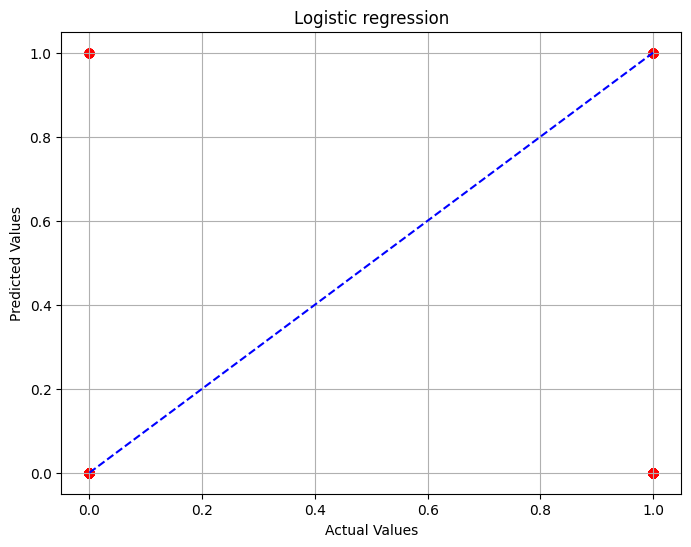

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Logistic regression")
plt.grid()
plt.show()

ROC and AUC graphs

In [17]:
from sklearn.metrics import roc_curve, auc

In [21]:
fpr, tpr, threshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

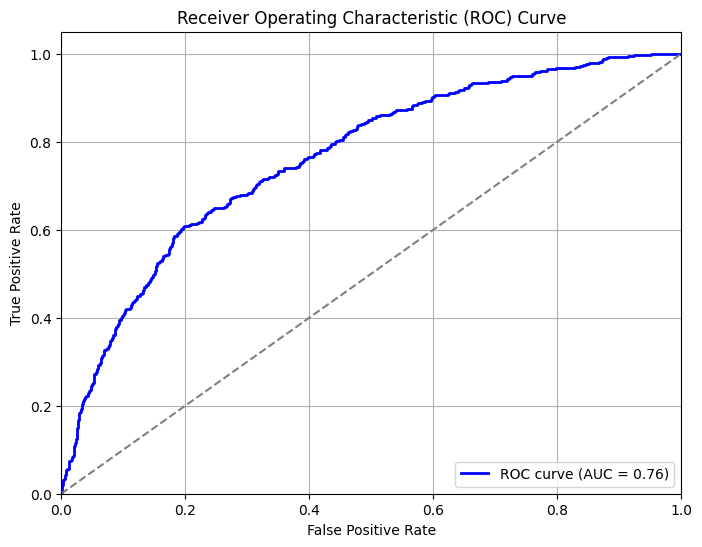

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
